<a href="https://colab.research.google.com/github/Seshasai14/DataScience-TuteDude/blob/Covid-Data-Analysis/Covid_Data_Analysis_Modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study Covid Data Analysis**

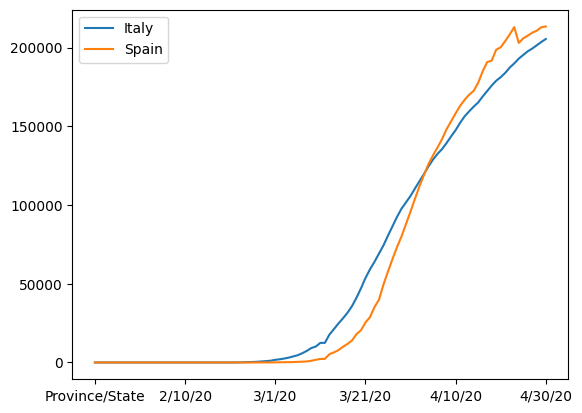

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv("/content/covid19_Confirmed_dataset.csv")

#delete the useless columns
dataset.drop(["Lat","Long"],axis=1,inplace=True)
#aggregate the rows by the country
corona_dataset_aggregated=dataset.groupby("Country/Region").sum()
corona_dataset_aggregated.head()
#In corona dataset delete a row containg china as a Country/Region
corona_dataset_aggregated.drop(["China"],axis=0,inplace=True)
# # Visualize the data related to a country
# corona_dataset.loc["china"].plot()
corona_dataset_aggregated.loc["Italy"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
plt.legend()



,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5


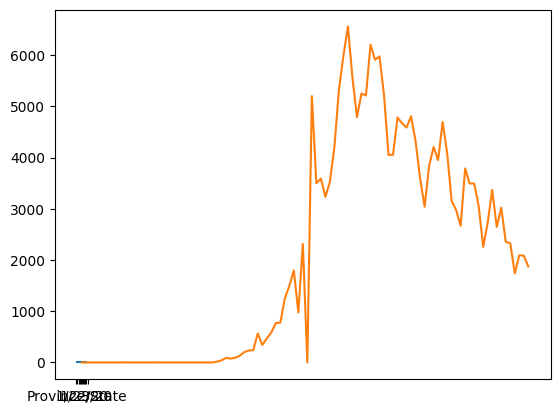

In [ ]:
# Calculate a good measure
corona_dataset_aggregated.loc["Italy"][:3].plot()

# Calculate the first derivative of the curve
corona_dataset_aggregated.loc["Italy"].diff().plot()

# Maximum infection rate
corona_dataset_aggregated.loc["Italy"].diff().max()

# Maximum infection rate for all countries
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []

for c in countries:
    # Convert the string column to numeric
    corona_dataset_aggregated.loc[c] = pd.to_numeric(corona_dataset_aggregated.loc[c], errors='coerce')
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())

corona_dataset_aggregated["max_infection_rates"] = max_infection_rates
corona_dataset_aggregated.head()

In [ ]:
corona_data=pd.DataFrame(corona_dataset_aggregated["max_infection_rates"])
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,232
Albania,34
Algeria,199
Andorra,43
Angola,5


In [ ]:
#import the dataset 2
import pandas as pd
happiness_report=pd.read_csv("/content/worldwide_happiness_report.csv")
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
#drop the useless columns
happiness_report.drop(["Overall rank","Score","Generosity","Perceptions of corruption"],axis=1,inplace=True)
happiness_report.head()
happiness_report

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...,...
151,Rwanda,0.359,0.711,0.614,0.555
152,Tanzania,0.476,0.885,0.499,0.417
153,Afghanistan,0.350,0.517,0.361,0.000
154,Central African Republic,0.026,0.000,0.105,0.225


In [ ]:
happiness_report.set_index("Country or region",inplace=True)
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [ ]:
# join the Dataset
corona_data.shape

(186, 1)

In [ ]:
happiness_report.shape

(156, 4)

In [ ]:
data=corona_data.join(happiness_report,how="inner")
data.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232,0.350,0.517,0.361,0.000
Albania,34,0.947,0.848,0.874,0.383
Algeria,199,1.002,1.160,0.785,0.086
Argentina,291,1.092,1.432,0.881,0.471
Armenia,134,0.850,1.055,0.815,0.283


In [ ]:
data.corr()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rates,1.000000,0.258649,0.216153,0.288509,0.054703
GDP per capita,0.258649,1.000000,0.760557,0.863252,0.393722
Social support,0.216153,0.760557,1.000000,0.768115,0.459125
Healthy life expectancy,0.288509,0.863252,0.768115,1.000000,0.425405
Freedom to make life choices,0.054703,0.393722,0.459125,0.425405,1.000000


<Axes: xlabel='GDP per capita', ylabel='max_infection_rates'>

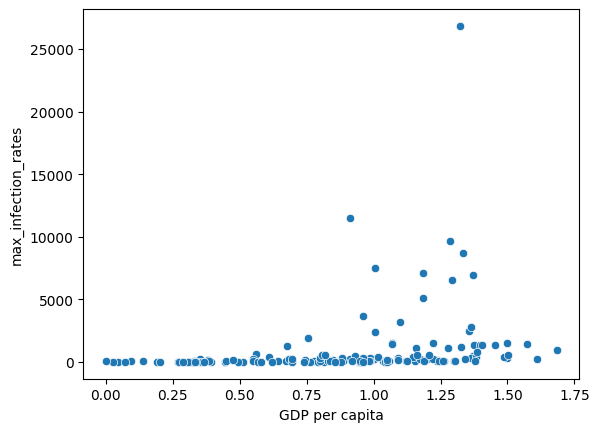

In [ ]:
import seaborn as sns
#visualization
x=data["GDP per capita"]
y=data["max_infection_rates"]
#plot scatter plot using matplotlib
sns.scatterplot(data=data, x="GDP per capita", y="max_infection_rates")


<Axes: xlabel='GDP per capita', ylabel='max_infection_rates'>

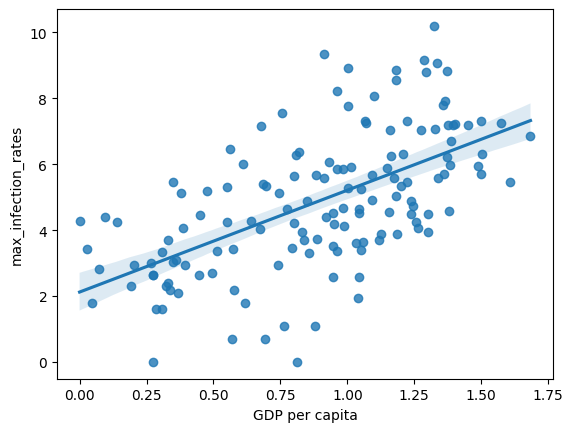

In [ ]:
sns.regplot(data=data, x="GDP per capita", y=np.log(data["max_infection_rates"]))

<Axes: xlabel='Social support', ylabel='max_infection_rates'>

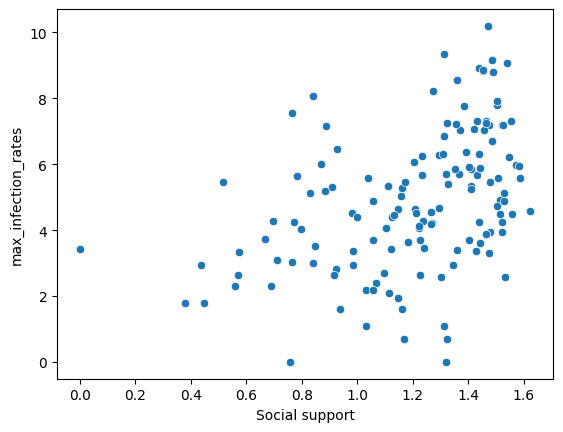

In [ ]:
sns.scatterplot(data=data, x="Social support", y=np.log(data["max_infection_rates"]))

<Axes: xlabel='Healthy life expectancy', ylabel='max_infection_rates'>

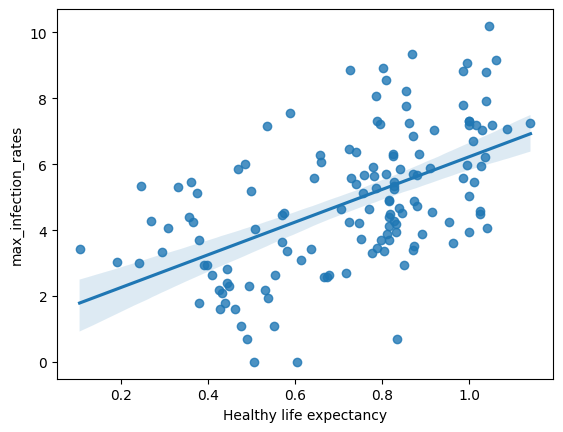

In [ ]:
sns.regplot(data=data, x="Healthy life expectancy", y=np.log(data["max_infection_rates"]))